In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt


import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')


import OONMF
import OONMFhelpers as OH
import OONMFmetadata as OMD

In [2]:
projectedNMF = OONMF.NMFobject(16)


In [3]:
projectedNMF.matrix_input_name('2019-05-08MotifClusterPA_X_ComponentsNC16NNDSVD.npy', '2018-06-08NC16_NNDSVD_Mixture.npy' )


In [4]:
projectedNMF.read_matrix_input()


In [5]:
projectedNMF.normalize_matrices()


/Users/amuratov/gits/EncodeNMF/OONMF.py:156: RuntimeWarning: invalid value encountered in true_divide
  self.NormedBasis =   (self.Basis.T / np.sum(self.Basis.T, axis=0)).T


In [32]:
projectedNMF.NormedBasis = np.nan_to_num(projectedNMF.NormedBasis)


In [7]:
# will not execute this block of code due to computational expense. Will read from a previous run instead
'''
from scipy.spatial.distance import cdist
cosine_distance_matrix = cdist(projectedNMF.NormedBasis, projectedNMF.NormedMixture.T, metric='cosine')
np.save('61319_DHS_motif_cosdist.npy',cosine_distance_matrix)
'''

cosine_distance_matrix = np.load('61319_DHS_motif_cosdist.npy')

In [10]:
cosine_distance_matrix.shape

(283, 3591898)

In [8]:
FIMO_PA = pd.read_csv('20619_FIMOtable_clusters.txt', sep='\t').values>0.5

In [31]:
motif_cluster_names = pd.read_csv('20619_FIMOtable_clusters.txt', sep='\t',nrows=0).columns.values

In [11]:
N_in_first_1000_ar = []
rat_in_first_1000_ar = []
rat_overall_ar = []
N_overall_ar = []
for i in range(cosine_distance_matrix.shape[0]):
    print(i)
    N = np.sum(FIMO_PA[:,i][np.argsort(cosine_distance_matrix[i])[0:1000]])
    N_in_first_1000_ar.append(N)
    rat_in_first_1000_ar.append(N/1000)
    Noverall = np.sum(FIMO_PA[:,i])
    N_overall_ar.append(Noverall)
    rat_overall_ar.append(Noverall/cosine_distance_matrix.shape[1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

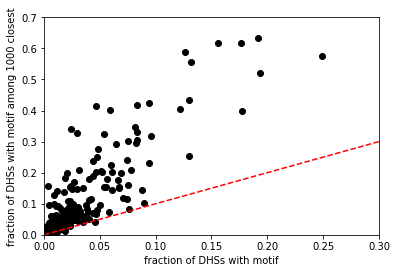

In [12]:
plt.clf()
plt.plot(rat_overall_ar, rat_in_first_1000_ar, 'ok')
plt.ylim([0, 0.7])
plt.plot([0,1], [0,1], '--r')
plt.xlim([0,0.3])
plt.xlabel('fraction of DHSs with motif')
plt.ylabel('fraction of DHSs with motif among 1000 closest')
plt.show()

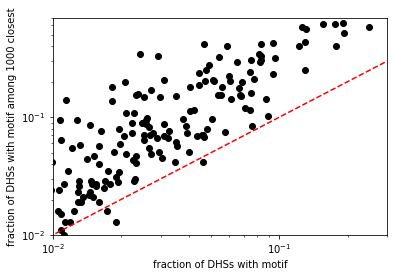

In [14]:
plt.clf()
plt.plot(rat_overall_ar, rat_in_first_1000_ar, 'ok')
plt.ylim([0.01, 0.7])
plt.plot([0,1], [0,1], '--r')
plt.xlim([0.01,0.3])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('fraction of DHSs with motif')
plt.ylabel('fraction of DHSs with motif among 1000 closest')
#plt.xlim([0,0.7])
plt.show()

### We see that if we pull out the top 1000 similar DHSs  to each motif, the fraction of DHSs where that motif actually occurs is much higher than in the full index of DHSs. 

## Visualize per-motif representation


In [15]:
from scipy.spatial.distance import pdist
from fastcluster import linkage
from polo import optimal_leaf_ordering
from scipy.cluster.hierarchy import dendrogram, linkage



In [18]:
bins_maxes_to_use = np.linspace(0,1,num=21)[1:]

In [19]:
bins_maxes_to_use

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [20]:
bin_mins_to_use = bins_maxes_to_use-0.05

In [21]:
bin_mins_to_use

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [33]:
projectedNMF.define_colors()

In [22]:
frac_present_matrix = []
N_present_matrix = []
N_overall_matrix = []
for i, binmin in enumerate(bin_mins_to_use):
    print(i)
    binmax = bins_maxes_to_use[i]
    bincut = (cosine_distance_matrix >= binmin) * (cosine_distance_matrix < binmax)
    N_sites_with_cosdist = np.sum(bincut, axis=1)
    N_present_sites_with_cosdist = np.sum(np.multiply(FIMO_PA.T, bincut), axis=1)
    
    frac_present_matrix.append(N_present_sites_with_cosdist/(N_sites_with_cosdist+1e-12))
    N_present_matrix.append(N_present_sites_with_cosdist)
    N_overall_matrix.append(N_sites_with_cosdist)

0


/Users/amuratov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater_equal
  import sys
/Users/amuratov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [24]:
frac_present_matrix = np.array(frac_present_matrix)

In [28]:
frac_present_matrix.shape

(20, 283)

In [ ]:
numFIMOS.index.values 

In [57]:
def make_optimally_ordered_heatmap(myNMFobject, heatmappable_matrix, names, cbarlabel=''):
    D = pdist(heatmappable_matrix.T, 'euclidean')
    Z = linkage(D, 'ward')
    optimal_Z = optimal_leaf_ordering(Z, D)
    dn = dendrogram(optimal_Z)
    dend_plot_order = dn['leaves']
    dend_plot_order = np.array(dend_plot_order)
    plt.clf()
    plt.figure(figsize=(10,60))
    plt.imshow(heatmappable_matrix.T[dend_plot_order], cmap='magma', vmin=0, vmax=1)
    plt.yticks(np.arange(heatmappable_matrix.shape[1]), names[dend_plot_order] )
    ax = plt.gca()
    for j, tick in enumerate(ax.get_yticklabels()):
        tick.set_color(np.array(myNMFobject.Comp_colors)[np.argmax(myNMFobject.NormedBasis, axis=1)][dend_plot_order][j])
    plt.xlabel('cosine distance')
    plt.xticks([0,5,10,15,20], ['0', '0.25', '0.5', '0.75', '1'])
    plt.colorbar(shrink=0.3, label=cbarlabel)
    plt.show()

<Figure size 432x288 with 0 Axes>

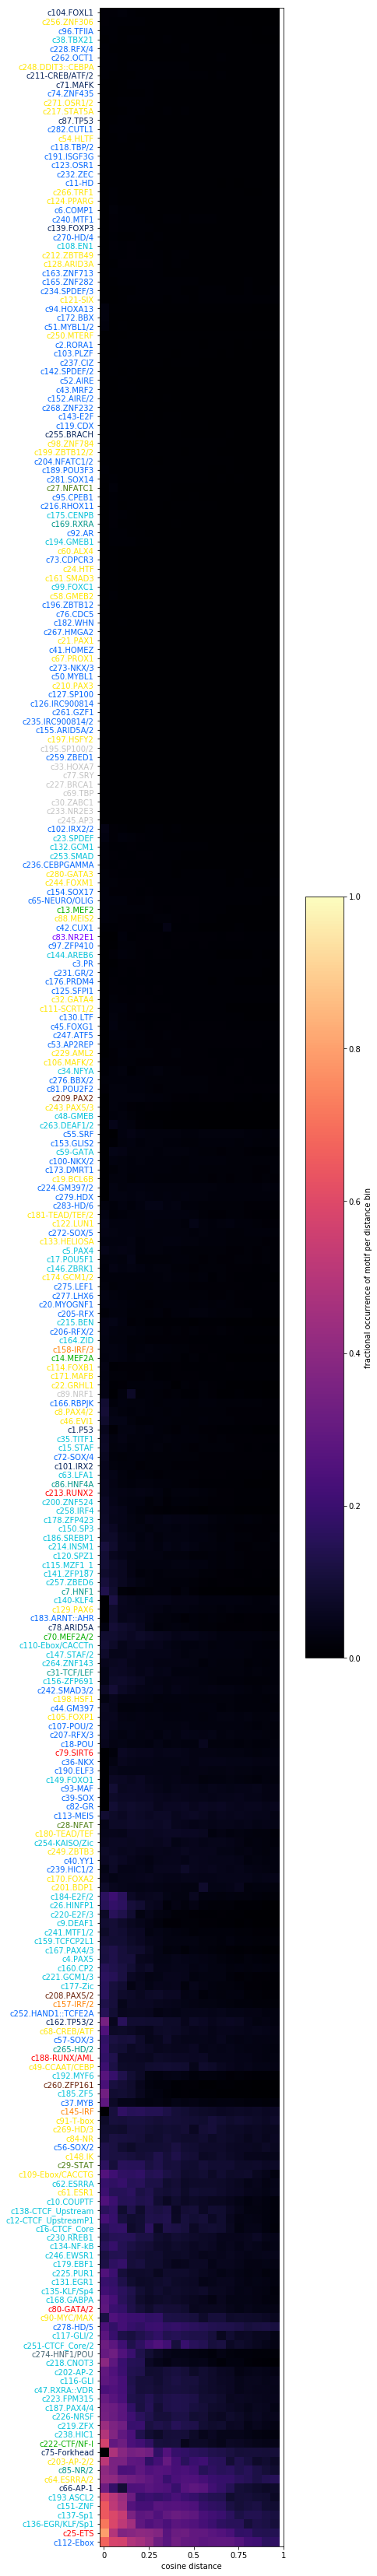

In [61]:
make_optimally_ordered_heatmap(projectedNMF, frac_present_matrix, motif_cluster_names, cbarlabel='fractional occurrence of motif per distance bin')

In [60]:
frac_present_matrix_normed = frac_present_matrix / (np.sum(frac_present_matrix,axis=0) + 1e-12)

<Figure size 432x288 with 0 Axes>

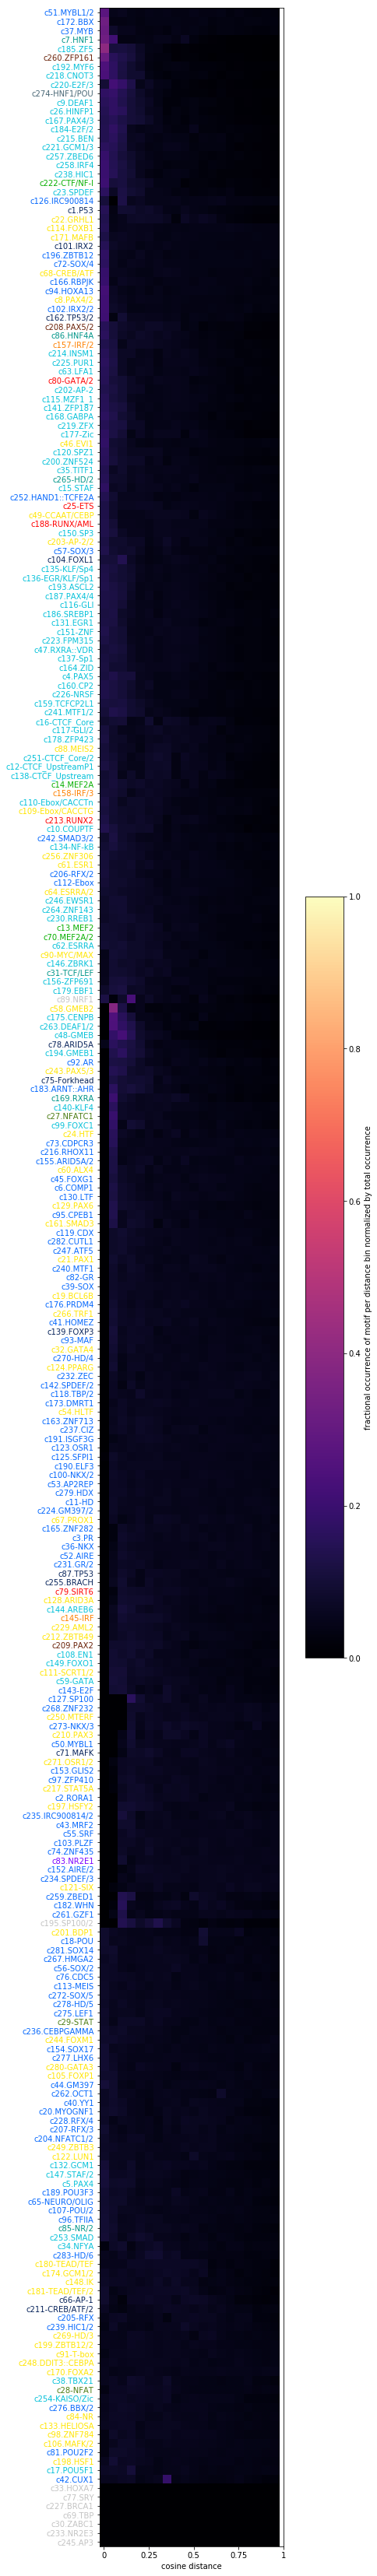

In [62]:
make_optimally_ordered_heatmap(projectedNMF, frac_present_matrix_normed, motif_cluster_names,cbarlabel='fractional occurrence of motif per distance bin normalized by total occurrence')

In [42]:
frac_present_matrix_maxnormed = frac_present_matrix / (np.max(frac_present_matrix,axis=0) + 1e-12)

<Figure size 432x288 with 0 Axes>

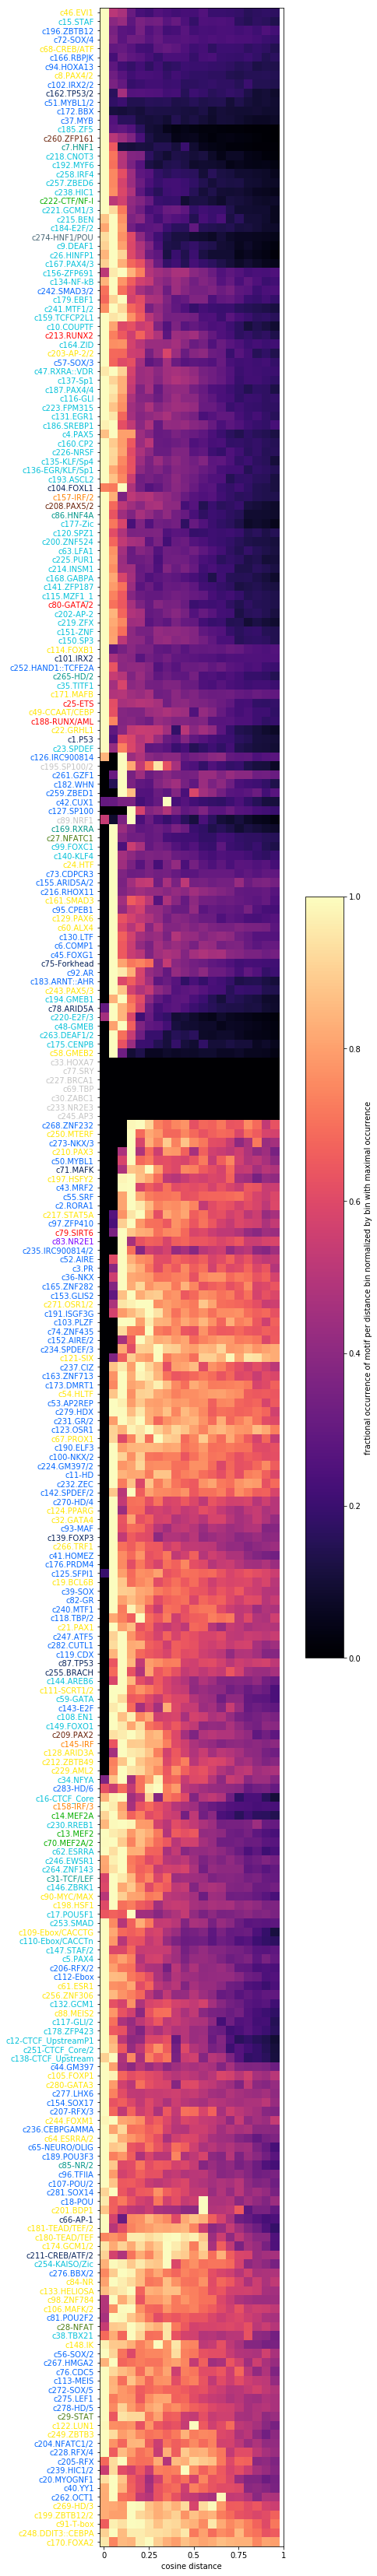

In [63]:
make_optimally_ordered_heatmap(projectedNMF, frac_present_matrix_maxnormed, motif_cluster_names,cbarlabel='fractional occurrence of motif per distance bin normalized by bin with maximal occurrence')

### What we see here is that in general, DHSs that have a low cosine distance (similar component composition) to a given motif are more likely to contain the motif than those with higher cosine distances. However, many motifs have very low occurence rates overall. If we normalize by the bine with maximum occurence, we clearly do see that most motifs do have higher DHS occurrence in their closer bins. 

### Linear visualization instead of heatmap

In [68]:
def make_giant_binplot_grid_figure(matrix, names, foutname):
    giant_grid = plt.subplots(18,16, figsize=(90,70))
    for i in range(matrix.shape[1]):
        colnum = i%16
        rownum = i//16
        giant_grid[1][rownum,colnum].plot( np.arange(20)*0.05 + 0.025, matrix[:,i], 'ok')
        giant_grid[1][rownum,colnum].set_title(names[i])
    plt.savefig(foutname,bbox_inches='tight')


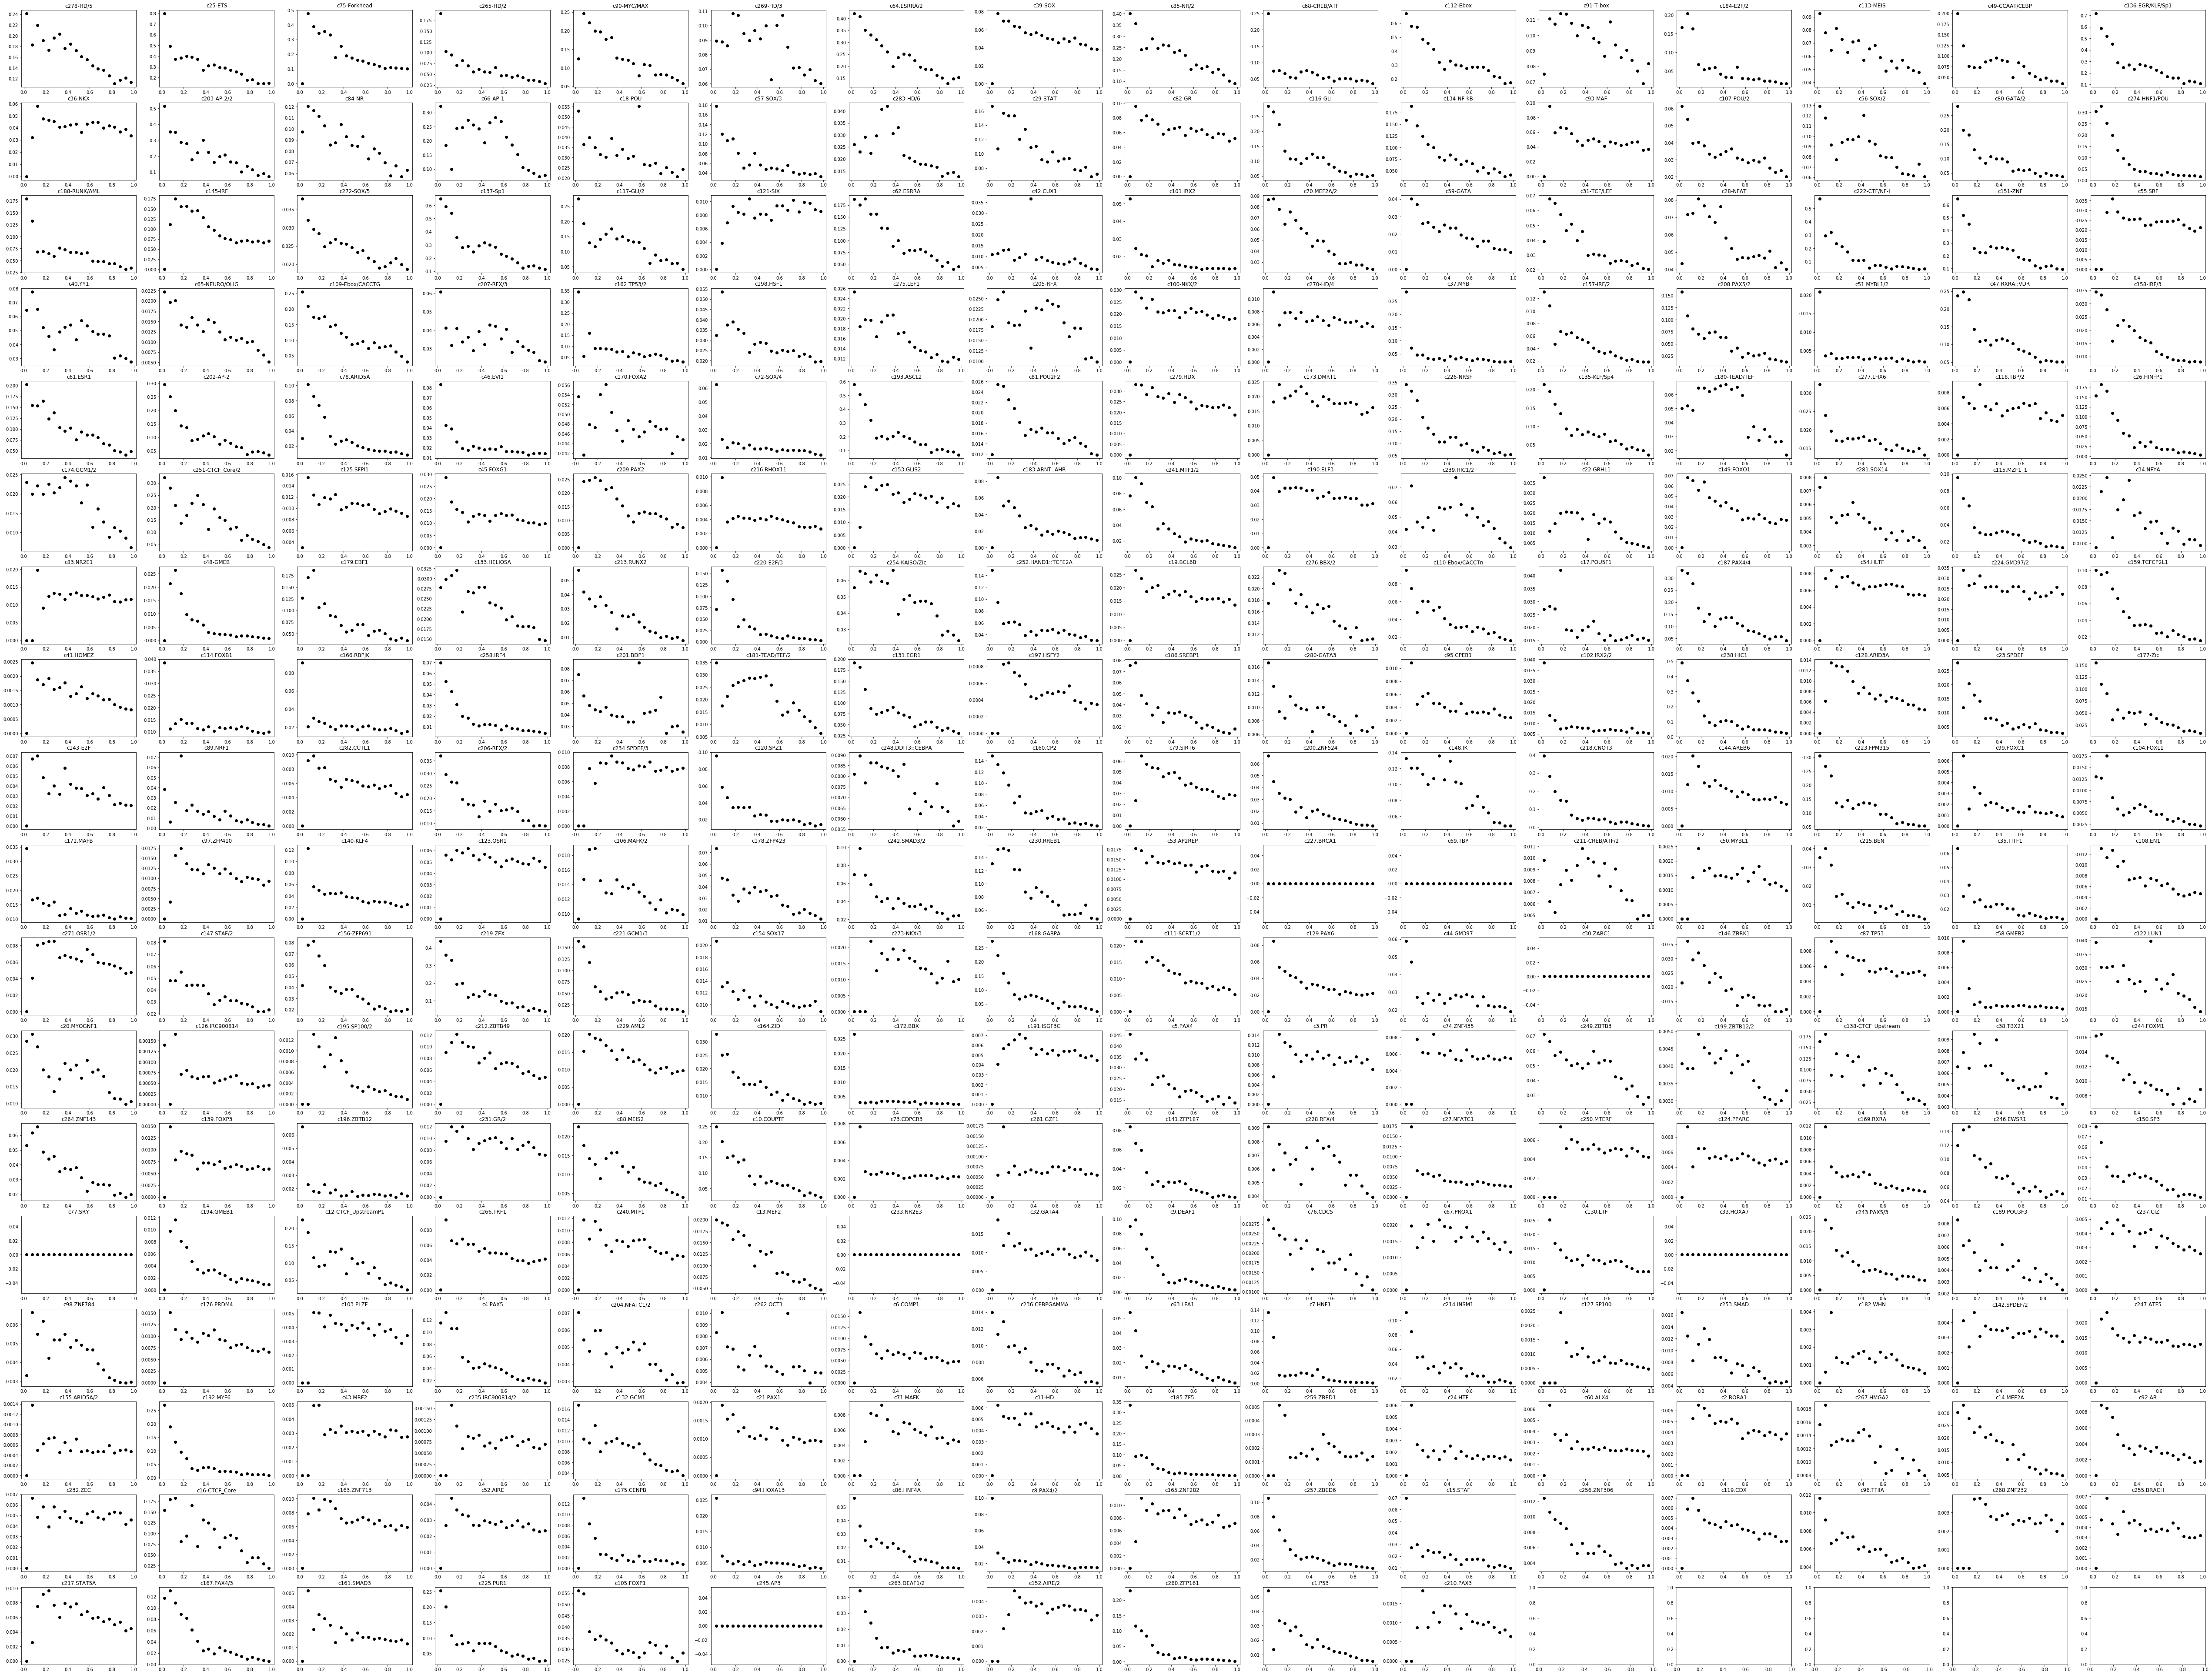

In [70]:
make_giant_binplot_grid_figure(frac_present_matrix, motif_cluster_names, '73119_big_panel_of_presence_vs_cosdist.pdf')

### this version very nicely shows the relationship between motifs and DHSs through cosine distance and requires no normalizing (although some of the y axes are very different than others) 


## Normalizing by the max bin is one way of showing that the NMF projection is a useful coordinate system for motifs, but it feels somewhat deceptive. 

## Some motifs appear much more frequently than others. We can factor this in when gaguing how successful the projected NMF motif scores are at aligning with the DHSs where they actually occur. We already know that those motifs that occur most frequently have the highest AUPRC, but would we fare better if we factor in occurence frequency into our evaluation? 

In [72]:
FIMO_PA.shape

(3591898, 283)

In [73]:
total_num_DHS_per_motifcluster = np.sum(FIMO_PA, axis=0)

In [74]:
len(total_num_DHS_per_motifcluster)

283

In [78]:
cosine_distance_matrix.shape

(283, 3591898)

### in this case, lets see if 2 * N_DHS for each motif occurence is enough to capture 

In [76]:
bins_maxes_to_use = np.linspace(0,2,num=41)[1:]

In [79]:
FIMO_PA.shape

(3591898, 283)

In [82]:
enrich_mat = [] 
num_DHSs_to_25 = [] 
num_DHSs_to_50 = []
num_DHSs_to_75 = []
num_DHSs_to_100 = []
for i in range(len(total_num_DHS_per_motifcluster)):
    print(i)
    if total_num_DHS_per_motifcluster[i] == 0:
        enrich_mat.append([0]*40)
        num_DHSs_to_25.append(0)
        num_DHSs_to_50.append(0)
        num_DHSs_to_75.append(0)
        num_DHSs_to_100.append(0)

        continue
    NDHS_to_use = total_num_DHS_per_motifcluster[i]
    indorder = np.argsort(cosine_distance_matrix[i])
    cumsum = np.cumsum(FIMO_PA[:,i][indorder])
    cumsum_normed = cumsum/NDHS_to_use

    num_DHSs_to_25.append(np.argwhere(cumsum == int(NDHS_to_use*0.25)).flatten()[0])
    num_DHSs_to_50.append(np.argwhere(cumsum == int(NDHS_to_use*0.5)).flatten()[0])
    num_DHSs_to_75.append(np.argwhere(cumsum == int(NDHS_to_use*0.75)).flatten()[0])
    num_DHSs_to_100.append(np.argwhere(cumsum == int(NDHS_to_use)).flatten()[0])

    
    enrichline = []
    for binmax in bins_maxes_to_use:
        N_to_lookat = int(NDHS_to_use*binmax) 
        NumHits = np.sum(FIMO_PA[:,i][indorder[0:N_to_lookat]])
        enrichline.append(NumHits/N_to_lookat)
    enrich_mat.append(enrichline)
    



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [84]:
num_DHSs_to_25 = np.array(num_DHSs_to_25)
num_DHSs_to_50 = np.array(num_DHSs_to_50)
num_DHSs_to_75 = np.array(num_DHSs_to_75)
num_DHSs_to_100 = np.array(num_DHSs_to_100)
enrich_mat = np.array(enrich_mat)

In [90]:
f_total_to_25 = num_DHSs_to_25 / (total_num_DHS_per_motifcluster+1e-12)
f_total_to_50 = num_DHSs_to_50 / (total_num_DHS_per_motifcluster+1e-12)
f_total_to_75 = num_DHSs_to_75 / (total_num_DHS_per_motifcluster+1e-12)
f_total_to_100 = num_DHSs_to_100 / (total_num_DHS_per_motifcluster+1e-12)


In [99]:
f_total_to_25_genome = num_DHSs_to_25 / (FIMO_PA.shape[0])
f_total_to_50_genome = num_DHSs_to_50 / (FIMO_PA.shape[0])
f_total_to_75_genome = num_DHSs_to_75 / (FIMO_PA.shape[0])
f_total_to_100_genome = num_DHSs_to_100 / (FIMO_PA.shape[0])

In [101]:
np.median(f_total_to_25_genome[f_total_to_50>0])

0.18041895955842843

In [102]:
np.median(f_total_to_50_genome[f_total_to_50>0])

0.40378805300150505

In [103]:
np.median(f_total_to_75_genome[f_total_to_50>0])

0.6745851357694456

In [104]:
np.median(f_total_to_100_genome[f_total_to_50>0])

0.9999792588765049

## unfortunately, we find that on average, using cosine distance of projected NMF loadings of motifs to DHSs is not an efficient look-up system for actual motif occupancy. For example, the median fraction of DHSs needed to be scanend to achieve 25% completeness of motif binding sites is 0.18. This is better than random, but not exactly a home run.

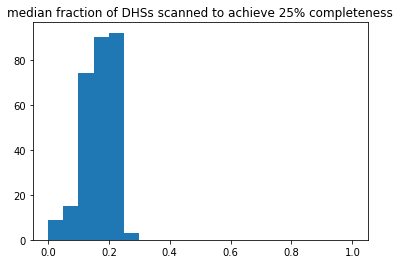

In [138]:
plt.clf()
plt.hist(f_total_to_25_genome, bins=20, range=[0,1])
plt.title('median fraction of DHSs scanned to achieve 25% completeness')
plt.show()

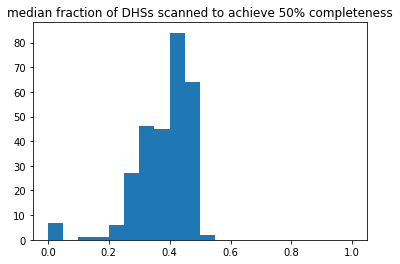

In [139]:
plt.clf()
plt.hist(f_total_to_50_genome, bins=20, range=[0,1])
plt.title('median fraction of DHSs scanned to achieve 50% completeness')
plt.show()

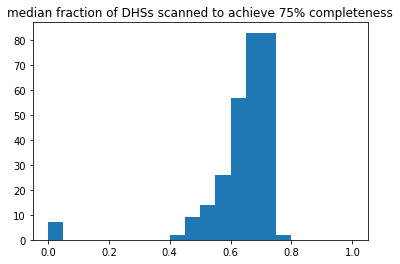

In [140]:
plt.clf()
plt.hist(f_total_to_75_genome, bins=20, range=[0,1])
plt.title('median fraction of DHSs scanned to achieve 75% completeness')
plt.show()

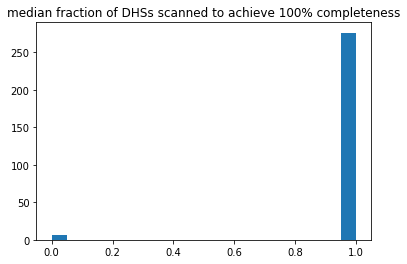

In [141]:
plt.clf()
plt.hist(f_total_to_100_genome, bins=20, range=[0,1])
plt.title('median fraction of DHSs scanned to achieve 100% completeness')
plt.show()

In [144]:
def make_optimally_ordered_heatmap_enrichment(myNMFobject, heatmappable_matrix, names, cbarlabel=''):
    D = pdist(heatmappable_matrix.T, 'euclidean')
    Z = linkage(D, 'ward')
    optimal_Z = optimal_leaf_ordering(Z, D)
    dn = dendrogram(optimal_Z)
    dend_plot_order = dn['leaves']
    dend_plot_order = np.array(dend_plot_order)
    plt.clf()
    plt.figure(figsize=(10,60))
    plt.imshow(heatmappable_matrix.T[dend_plot_order], cmap='magma', vmin=0, vmax=1)
    plt.yticks(np.arange(heatmappable_matrix.shape[1]), names[dend_plot_order] )
    ax = plt.gca()
    for j, tick in enumerate(ax.get_yticklabels()):
        tick.set_color(np.array(myNMFobject.Comp_colors)[np.argmax(myNMFobject.NormedBasis, axis=1)][dend_plot_order][j])
    plt.xlabel('fraction of total number of motif occurences')
    plt.xticks([0,10,20, 30, 40], ['0', '0.5', '1', '1.5', '2'])
    plt.colorbar(shrink=0.3, label=cbarlabel)
    plt.show()

<Figure size 432x288 with 0 Axes>

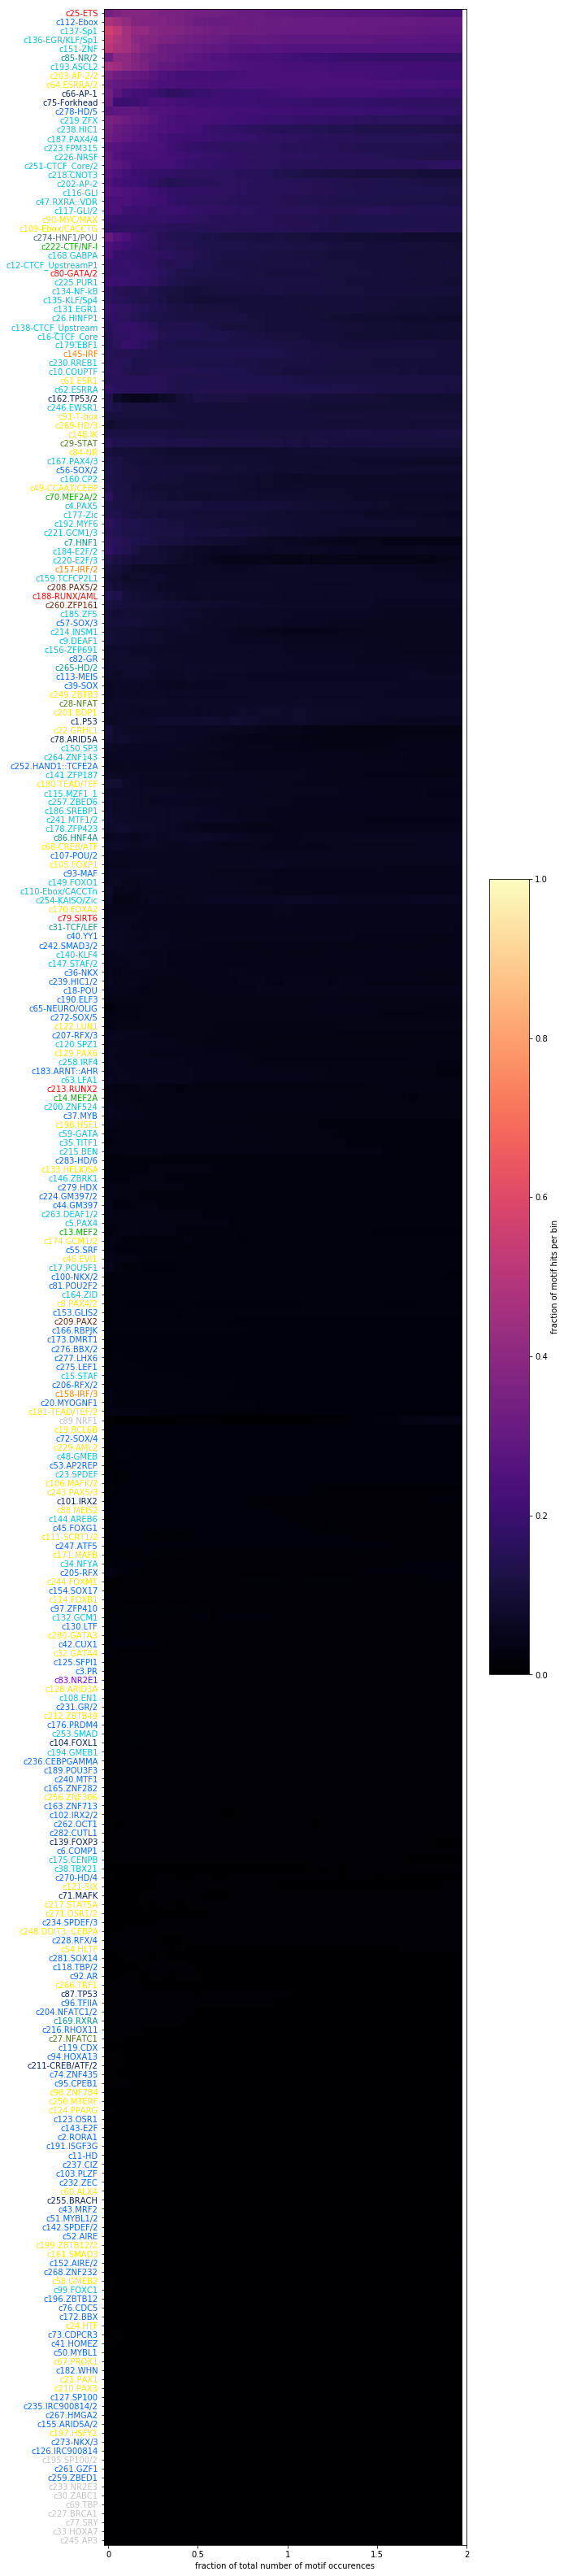

In [147]:
make_optimally_ordered_heatmap_enrichment(projectedNMF, enrich_mat.T, motif_cluster_names,cbarlabel='fraction of motif hits per bin')

may as well max normalize this one as well

In [148]:
enrich_mat.shape

(283, 40)

In [152]:
enrich_mat_normed = (enrich_mat.T / (np.max(enrich_mat, axis=1) + 1e-12))

In [153]:
enrich_mat_normed.shape

(40, 283)

<Figure size 432x288 with 0 Axes>

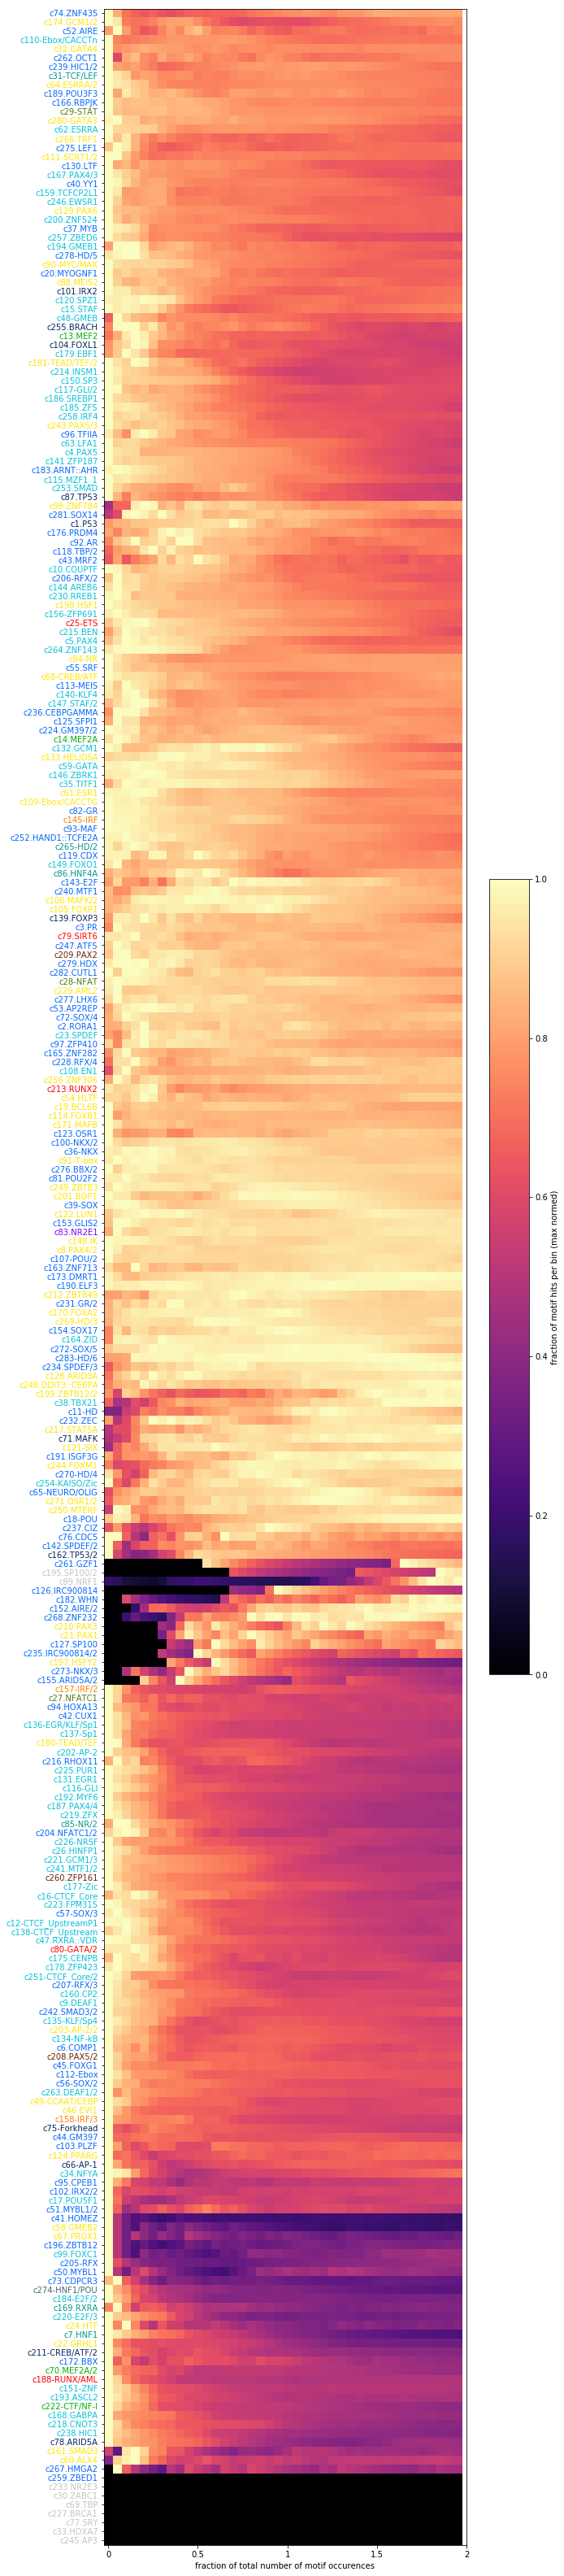

In [156]:
make_optimally_ordered_heatmap_enrichment(projectedNMF, enrich_mat_normed, motif_cluster_names,cbarlabel='fraction of motif hits per bin (max normed)')

Some motifs clearly are well-described by this system while others arent

### we can still show that it's not the worst system by max-normalizing again

In [142]:
bins_to_try = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100])/100

In [ ]:
    for thebin in bins_to_try:
        bin_limit = int(FIMO_PA.shape[0]*thebin)
        bin_limit = min([bin_limit, FIMO_PA.shape[0]-1 ])
        f_hits = np.sum(FIMO_PA[:,i][argorder][0:bin_limit])/ bin_limit
        thecosdist = motif_DHS_cosdist[i][argorder][bin_limit]
        line_of_cosdists.append(thecosdist)
        line_of_bins.append(f_hits)

In [192]:
cumulative_enrich_mat = [] 
for i in range(len(total_num_DHS_per_motifcluster)):
    print(i)
    if total_num_DHS_per_motifcluster[i] == 0:
        cumulative_enrich_mat.append([0]*len(bins_to_try))
        continue
    NDHS_to_use = total_num_DHS_per_motifcluster[i]
    indorder = np.argsort(cosine_distance_matrix[i])
    line_of_bins = []
    for thebin in bins_to_try:
        bin_limit = int(FIMO_PA.shape[0]*thebin)
        bin_limit = min([bin_limit, FIMO_PA.shape[0]-1 ])
        f_hits = np.sum(FIMO_PA[:,i][indorder][0:bin_limit])/ bin_limit
        line_of_bins.append(f_hits)
    cumulative_enrich_mat.append(line_of_bins)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [193]:
cumulative_enrich_mat = np.array(cumulative_enrich_mat)

In [160]:
def make_optimally_ordered_heatmap_genomefraction(myNMFobject, heatmappable_matrix, names, bins_to_try,cbarlabel=''):
    D = pdist(heatmappable_matrix.T, 'euclidean')
    Z = linkage(D, 'ward')
    optimal_Z = optimal_leaf_ordering(Z, D)
    dn = dendrogram(optimal_Z)
    dend_plot_order = dn['leaves']
    dend_plot_order = np.array(dend_plot_order)
    plt.clf()
    plt.figure(figsize=(10,60))
    plt.imshow(heatmappable_matrix.T[dend_plot_order], cmap='magma', vmin=0, vmax=1)
    plt.yticks(np.arange(heatmappable_matrix.shape[1]), names[dend_plot_order] )
    ax = plt.gca()
    for j, tick in enumerate(ax.get_yticklabels()):
        tick.set_color(np.array(myNMFobject.Comp_colors)[np.argmax(myNMFobject.NormedBasis, axis=1)][dend_plot_order][j])
    plt.xlabel('fraction of DHSs scanned')
    plt.xticks(np.arange(len(bins_to_try)), np.array(bins_to_try).astype(str), rotation='vertical')
    plt.colorbar(shrink=0.3, label=cbarlabel)
    plt.show()

In [174]:
cumulative_enrich_mat.shape

(283, 9)

In [194]:
cumulative_enrich_mat  = np.nan_to_num(cumulative_enrich_mat)

<Figure size 432x288 with 0 Axes>

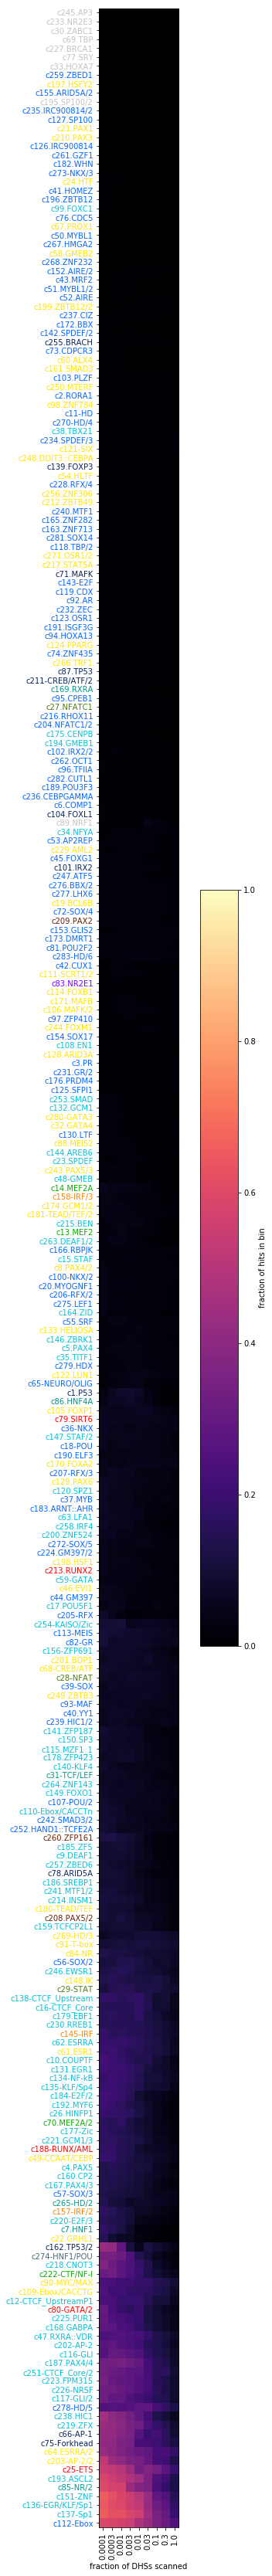

In [195]:
make_optimally_ordered_heatmap_genomefraction(projectedNMF, cumulative_enrich_mat.T, motif_cluster_names,bins_to_try, cbarlabel='fraction of hits in bin')

In [196]:
cumulative_enrich_mat_maxnormed = (cumulative_enrich_mat.T/(np.max(cumulative_enrich_mat, axis=1)+1e-12)).T

In [197]:
cumulative_enrich_mat_maxnormed[0]

array([0.89959078, 0.9191471 , 0.89640763, 0.92458475, 1.        ,
       0.99375925, 0.77186299, 0.60972102, 0.45641946])

<Figure size 432x288 with 0 Axes>

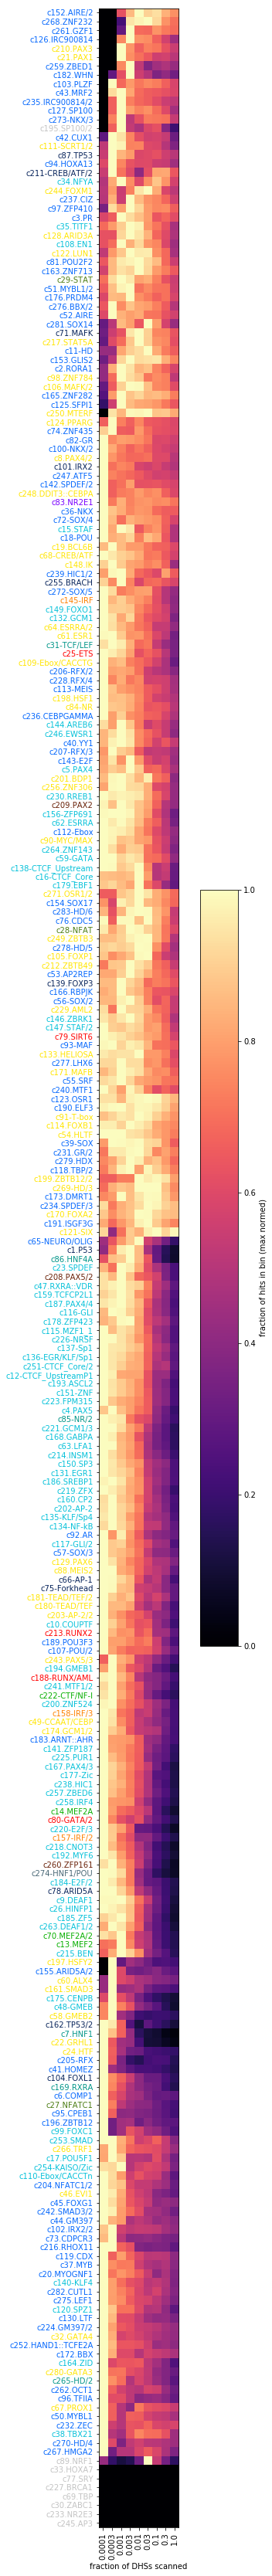

In [198]:
make_optimally_ordered_heatmap_genomefraction(projectedNMF, cumulative_enrich_mat_maxnormed.T, motif_cluster_names,bins_to_try, cbarlabel='fraction of hits in bin (max normed)')

### Again, we come to the same conclusion - the coordinate system is useful for describing some motifs but not others. The motif data may be too noisy to model accurately with this approach, but at least we know that our method captures some of the signal